# Part One

In [48]:
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

url = open("/Users/patriciaattah/anaconda_files/ultimate_challenge/ultimate_data_challenge.json", "r") 
d = json.load(url)

df = json_normalize(d)
df1 = df
df.head(3) 

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.0,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0


In [49]:
# json list to pdf
import numpy as np
dt = pd.read_json(open('logins.json'))
dt['login'] = dt['login_time']

dt

,login_time,login
0,1970-01-01 20:13:18,1970-01-01 20:13:18
1,1970-01-01 20:16:10,1970-01-01 20:16:10
2,1970-01-01 20:16:37,1970-01-01 20:16:37
3,1970-01-01 20:16:36,1970-01-01 20:16:36
4,1970-01-01 20:26:21,1970-01-01 20:26:21
...,...,...
93137,1970-04-13 18:50:19,1970-04-13 18:50:19
93138,1970-04-13 18:43:56,1970-04-13 18:43:56
93139,1970-04-13 18:54:02,1970-04-13 18:54:02
93140,1970-04-13 18:57:38,1970-04-13 18:57:38


In [50]:
df_log = dt.set_index(['login_time'])
df_login = df_log.resample("15T").count()

df_15 = df_login.loc['1970-01-02 00:00:00':'1970-01-03 00:00:00']
df_login.iloc[109:210,]

,login
login_time,
1970-01-02 23:15:00,12
1970-01-02 23:30:00,12
1970-01-02 23:45:00,15
1970-01-03 00:00:00,5
1970-01-03 00:15:00,10
...,...
1970-01-03 23:15:00,17
1970-01-03 23:30:00,12
1970-01-03 23:45:00,15


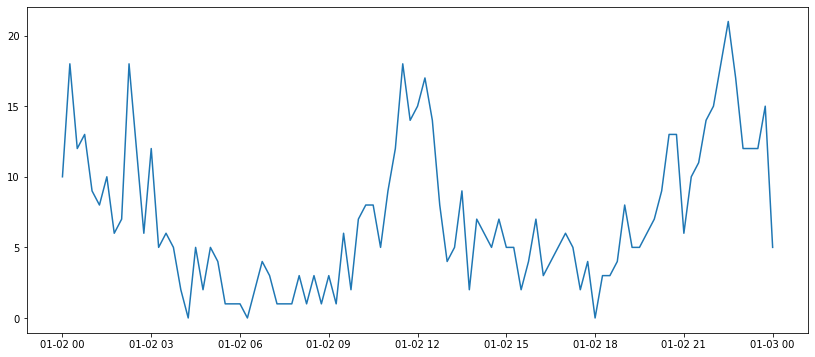

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot with pandas own matplotlib wrapper
#df_15.plot()

# plot directly with matplotlib pyplot
plt.figure(figsize=(14, 6))

plt.plot(df_15.index, df_15.login)
plt.show()

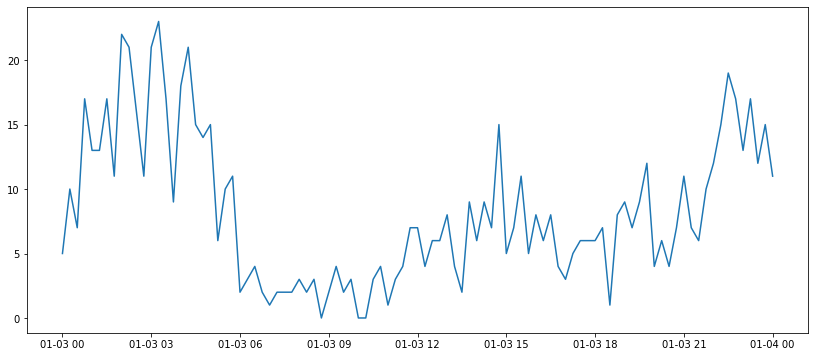

In [52]:
df_15_0 = df_login.loc['1970-01-03 00:00:00':'1970-01-04 00:00:00']

plt.figure(figsize=(14, 6))

plt.plot(df_15_0.index, df_15_0.login)
plt.show()

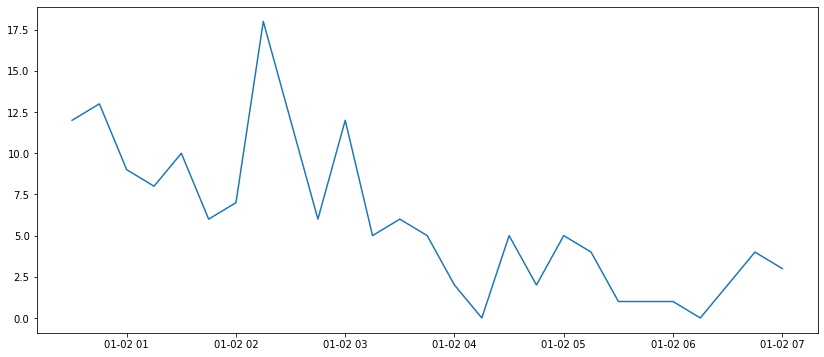

In [53]:
df_login_0 = df_log.resample('D').count()
login_d2=df_login.iloc[18:45,]
#df['count'].resample('M', how='sum')

plt.figure(figsize=(14, 6))

plt.plot(login_d2.index, login_d2.login)
plt.show()

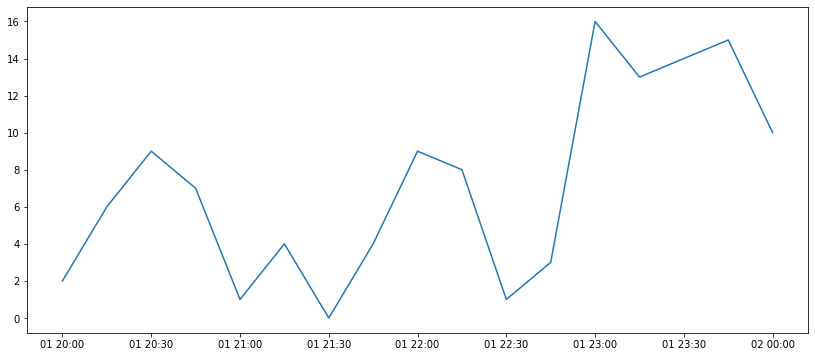

In [54]:
login_d=df_login.iloc[0:17,]
plt.figure(figsize=(14, 6))

plt.plot(login_d.index, login_d.login)
plt.show()

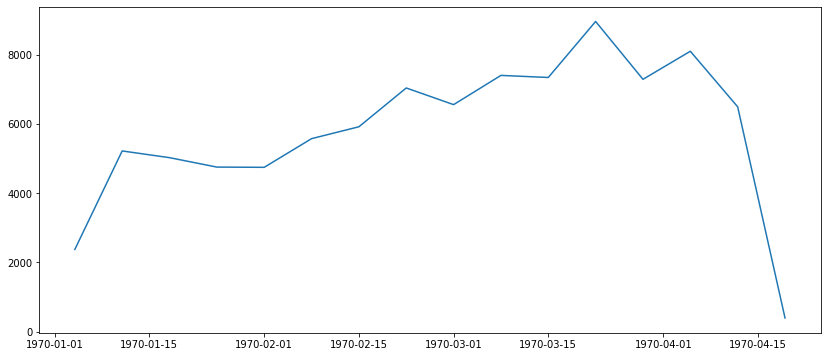

In [55]:
df_login_01 = df_log.resample('W').count()
login_01 = df_login_01.iloc[0:17,]

plt.figure(figsize=(14, 6))

plt.plot(login_01.index, login_01.login)
plt.show()

# Part Two

The key metric the metric would be a count of how many times the tolls were crossed by the drivers over a period of time such as 3 months before the tolls were being paid for by the company and compare it to how many times the tolls were crossed after the tolls started being paid for, for the same period of time that was recorded before the free toll incentive ie 3 months. 

The experiments would be to conduct a two sample t test with a null hypothesis would be that the mean of the distribution 3 months before the incentive is equal to the mean of the distributuion 3 months after the incentive.
the alternative hypothesis would be that the mean of the distribution 3 months before the incentive is less than the mean of the distributuion 3 months after the incentive.

1a.
<br>
step 1: define the null hypothesis as stated above.
<br>
Step 2: Find the degrees of freedom
<br>
Step 3: Compute the tetst statistic
<br>
Step 4: Compute the Pvalue
<br>
Step 5: Evaluate the null hypothesis
<br>
<br>

1b.
<br>
2 sample t test

1c.
<br>
Using an alpha value of 0.05 which is the standard value if the p value is below 0.05 then we reject the null hypothesis, which means there is strong evidence that the incentive of toll payment by the company did increase the number of times the tolls were crossed by a significant amount, which ultimately menas that the drivers are being less exclusive to one city which is the desirable out come.

# Part Three
to clean the data we first
<br>
1. changed the date columns to datetime objects 
<br>
2. Added a column called 6th month that has a yes or no value for if the rider was active in their 6th month
<br>
3. checked for all the null values and removed them. the rows reduced from 50,000 to 41,445 that is 82% of the data
<br>
4. We check if the data is balanced and found out it was unbalanced with more yes than no for the dependent variable so the data set was upscaled. and the new data was 22% more than the original data set with 61,280 rows.

In [104]:
# change sign up column ad last trip clumn to datetime objects
df1['signup_date'] =  pd.to_datetime(df1['signup_date'], format='%Y-%m-%d')
df1['last_trip_date'] =  pd.to_datetime(df1['last_trip_date'], format='%Y-%m-%d')  
df1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [105]:
# add 5 months to the current month to see 6th month customer
plus_month_period = 5
df2=df1.signup_date + pd.offsets.MonthOffset(plus_month_period)
df3 = df1.merge(df2, how='outer', left_index=True, right_index=True)
df3.head()

,city,trips_in_first_30_days,signup_date_x,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_date_y
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-06-25
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-06-29
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-06-06
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-06-10
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-06-27


In [106]:
past = df3['last_trip_date']
present = df3['signup_date_y']

In [107]:
df3['6th_month'] = np.where(past > present, 'yes','no') 
df3.iloc[100:105]
df3.shape

(50000, 14)

In [108]:
df3.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date_x                0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
signup_date_y                0
6th_month                    0
dtype: int64

In [109]:
#df4.city.unique()
df4 = df3.dropna()
df4.shape

(41445, 14)

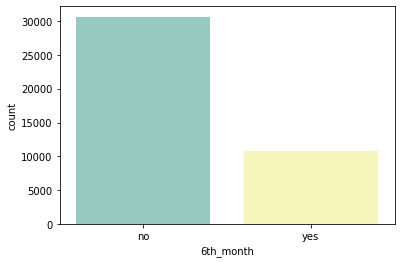

In [110]:
# Check if the data is balanced
sns.countplot(x = '6th_month', data = df4, palette = 'Set3' )

In [111]:
df5=df4
df5['city'] = df5['city'].str.replace(r"[\"\',]", '')

df6=df5
df6['city'] = np.where(df6.city == 'Astapor', 0, 
                       np.where(df6.city == 'Winterfell', 1, 2))
df6.head()

/Users/patriciaattah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/patriciaattah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,trips_in_first_30_days,signup_date_x,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_date_y,6th_month
0,2,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-06-25,no
1,0,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-06-29,no
2,0,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-06-06,no
3,2,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-06-10,yes
4,1,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-06-27,no


In [112]:
count_1, count_0 = df6['6th_month'].value_counts()

In [113]:
test_over0.shape

(61280, 14)

In [114]:
# Separate class
class_0 = df6[df6['6th_month'] == 'yes']
class_1 = df6[df6['6th_month'] == 'no']# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (10805, 14)
class 1: (30640, 14)


total class of 1 and 0: yes    30640
no     30640
Name: 6th_month, dtype: int64


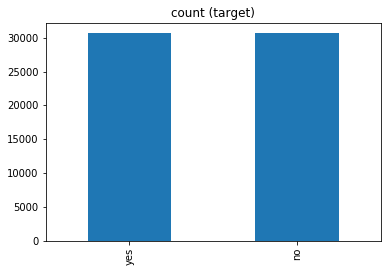

In [115]:
os = class_0.sample(count_1, replace=True)

test_over0 = pd.concat([os, class_1], axis=0)

print("total class of 1 and 0:",test_over0['6th_month'].value_counts())# plot the count after under-sampeling
test_over0['6th_month'].value_counts().plot(kind='bar', title='count (target)')

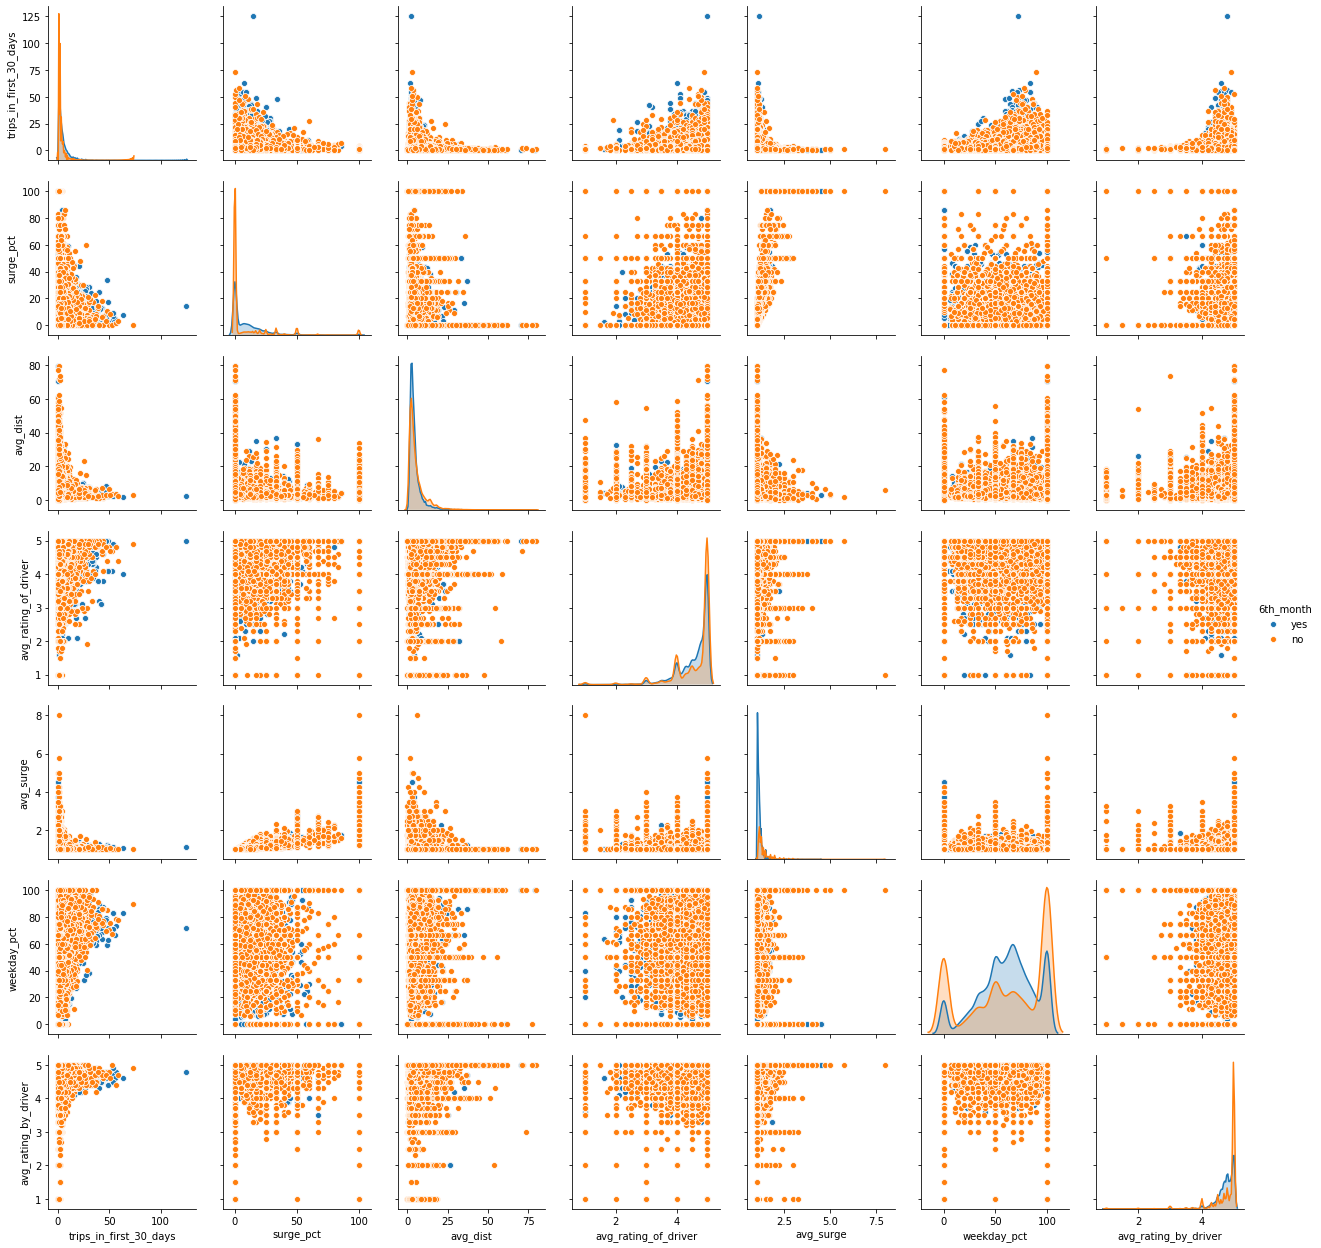

In [116]:
import seaborn as sns

#g = sns.pairplot(df4)

sns.pairplot(
    test_over0,
    x_vars=["trips_in_first_30_days", "surge_pct", "avg_dist","avg_rating_of_driver","avg_surge","weekday_pct","avg_rating_by_driver"],
    y_vars=["trips_in_first_30_days", "surge_pct", "avg_dist","avg_rating_of_driver","avg_surge","weekday_pct","avg_rating_by_driver"],
    hue='6th_month'
)

In [117]:
df_cor=test_over0[["trips_in_first_30_days", "surge_pct", "avg_dist","avg_rating_of_driver","avg_surge","weekday_pct","avg_rating_by_driver"]]
df_cor.corr()

,trips_in_first_30_days,surge_pct,avg_dist,avg_rating_of_driver,avg_surge,weekday_pct,avg_rating_by_driver
trips_in_first_30_days,1.000000,0.003026,-0.149751,0.001506,-0.003406,0.063503,-0.057014
surge_pct,0.003026,1.000000,-0.113238,0.006226,0.798148,-0.161102,0.028612
avg_dist,-0.149751,-0.113238,1.000000,0.032787,-0.088023,0.099443,0.083351
avg_rating_of_driver,0.001506,0.006226,0.032787,1.000000,-0.014039,0.015458,0.118113
avg_surge,-0.003406,0.798148,-0.088023,-0.014039,1.000000,-0.130766,0.017134
weekday_pct,0.063503,-0.161102,0.099443,0.015458,-0.130766,1.000000,0.020150
avg_rating_by_driver,-0.057014,0.028612,0.083351,0.118113,0.017134,0.020150,1.000000


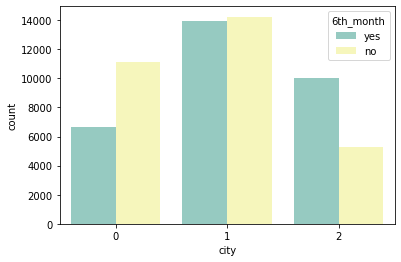

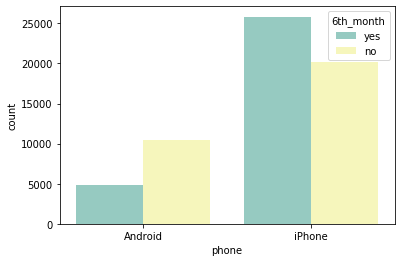

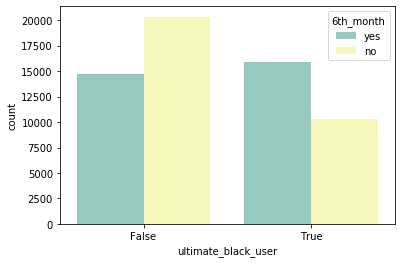

In [118]:
features = ['city', 'phone','ultimate_black_user']

for f in features:
    sns.countplot(x=f, data = test_over0, palette='Set3', hue = '6th_month')
    plt.show()

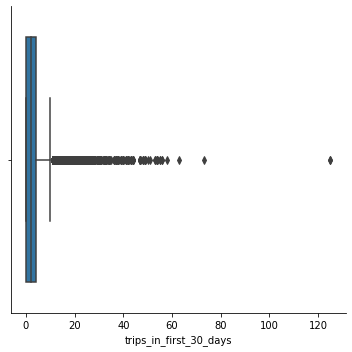

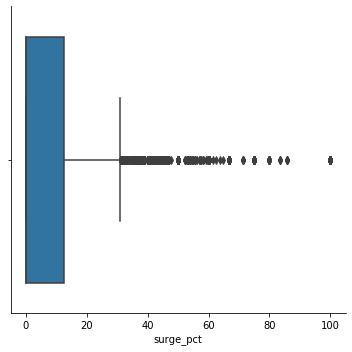

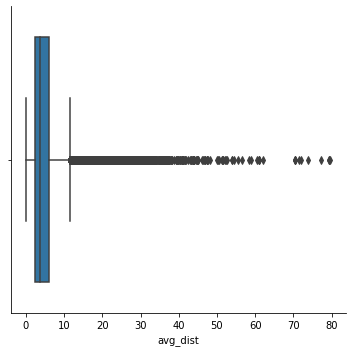

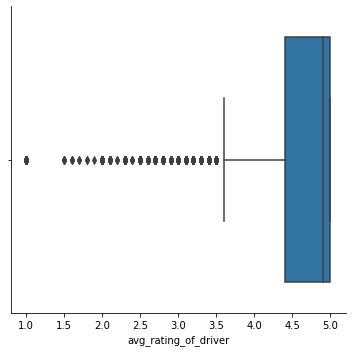

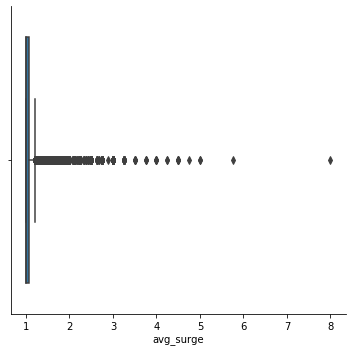

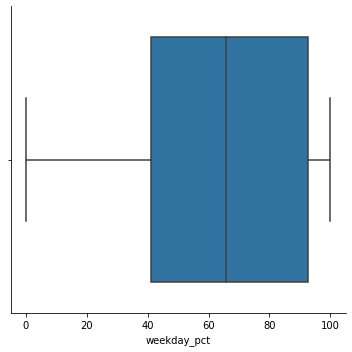

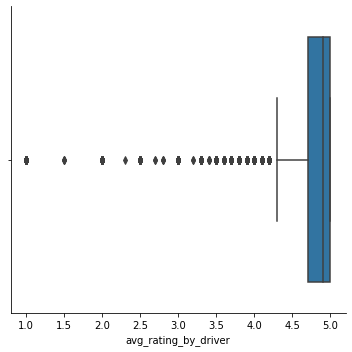

In [119]:
feature = ["trips_in_first_30_days", "surge_pct", "avg_dist","avg_rating_of_driver","avg_surge","weekday_pct","avg_rating_by_driver"]

for f in feature:
    sns.catplot(x=f, kind = 'box' ,data = test_over0)
    plt.show()

In [137]:
#change all varibale to numbers
df6['phone'] = np.where(df6.phone == 'IPhone', 0,1)
df6['ultimate_black_user'] = np.where(df6.ultimate_black_user == 'False', 0,1)
df6.head()

/Users/patriciaattah/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/patriciaattah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/patriciaattah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T

,city,trips_in_first_30_days,signup_date_x,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_date_y,6th_month
0,2,4,2014-01-25,4.7,1.10,2014-06-17,1,15.4,1,46.2,3.67,5.0,2014-06-25,no
1,0,0,2014-01-29,5.0,1.00,2014-05-05,1,0.0,1,50.0,8.26,5.0,2014-06-29,no
2,0,3,2014-01-06,4.3,1.00,2014-01-07,1,0.0,1,100.0,0.77,5.0,2014-06-06,no
3,2,9,2014-01-10,4.6,1.14,2014-06-29,1,20.0,1,80.0,2.36,4.9,2014-06-10,yes
4,1,14,2014-01-27,4.4,1.19,2014-03-15,1,11.8,1,82.4,3.13,4.9,2014-06-27,no


In [121]:
df7 = df6[["city", "trips_in_first_30_days",'avg_rating_of_driver','avg_surge',
              'phone','surge_pct','ultimate_black_user','weekday_pct','avg_dist',
              'avg_rating_by_driver','6th_month']]

df7=df7.rename(columns={"6th_month": "last_month"})

In [122]:
df7['last_month'] = np.where(df7.last_month == 'no', 0,1)
df7.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_month
0,2,4,4.7,1.10,1,15.4,1,46.2,3.67,5.0,0
1,0,0,5.0,1.00,1,0.0,1,50.0,8.26,5.0,0
2,0,3,4.3,1.00,1,0.0,1,100.0,0.77,5.0,0
3,2,9,4.6,1.14,1,20.0,1,80.0,2.36,4.9,1
4,1,14,4.4,1.19,1,11.8,1,82.4,3.13,4.9,0


In [138]:
#df7['last_month'].value_counts()

In [124]:
# Separate class
class_0 = df7[df7['last_month'] == 1]
class_1 = df7[df7['last_month'] == 0]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (10805, 11)
class 1: (30640, 11)


In [125]:
df7.isnull().sum()

city                      0
trips_in_first_30_days    0
avg_rating_of_driver      0
avg_surge                 0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
last_month                0
dtype: int64

total class of 1 and 0: 1    30640
0    30640
Name: last_month, dtype: int64


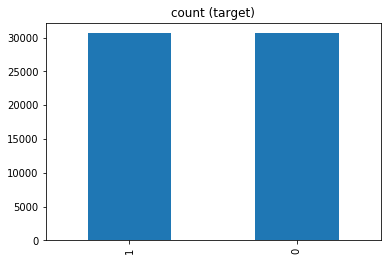

In [141]:
count_1, count_0 = df7['last_month'].value_counts()
os = class_0.sample(count_1, replace=True)

test_over = pd.concat([os, class_1], axis=0)

print("total class of 1 and 0:",test_over['last_month'].value_counts())# plot the count after under-sampeling
test_over['last_month'].value_counts().plot(kind='bar', title='count (target)')

## Model Selection
there are three models were selected to see which predicted more accurately. 
<br>
1. Logistic regression
<br>
2. Random forests
<br>
3. KNN
<br>
The random forest was the most successful algorithm with an accuracy of 85% and precision of 80%. from the permutation importance it showed that the city variable and the number trips in the first 30 days are some of the very important variables that are needed in model and phone and average surge percent is the lowest.

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn

X = test_over.drop(['last_month'], axis=1)
y = test_over['last_month']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.1, random_state=42)

In [143]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=15, solver = 'liblinear')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
y_pred0=rf.predict(X_test)

knn = knn()
knn.fit(X_train, y_train)
y_pred1=knn.predict(X_test)

In [144]:
# convert to int [y=y.astype(int)]

import eli5
from eli5.sklearn import PermutationImportance

In [145]:
perm = PermutationImportance(logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0674 ± 0.0043,city
0.0505 ± 0.0036,trips_in_first_30_days
0.0048 ± 0.0032,avg_dist
0.0026 ± 0.0036,avg_rating_by_driver
0.0012 ± 0.0009,surge_pct
0.0009 ± 0.0018,weekday_pct
0.0003 ± 0.0006,avg_rating_of_driver
0 ± 0.0000,ultimate_black_user
0 ± 0.0000,phone
-0.0008 ± 0.0007,avg_surge


In [146]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6284595300261097
Precision: 0.6290190735694823
Recall: 0.608621144213024


## Second algorithm Random forest
this was chosen because random forest is robust to different types of data ie non linear, unscaled data and data with missing values hence if you do not have a very good data set random forest can be a good choice. Hence if there is no preconceived notions about the data a random forest is a good firt pass model to use because of its verstility.

In [147]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred0))
print("Precision:",metrics.precision_score(y_test, y_pred0))
print("Recall:",metrics.recall_score(y_test, y_pred0))

Accuracy: 0.8574412532637076
Precision: 0.808122290668492
Recall: 0.9338254679673083


In [148]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))

Accuracy: 0.7492819843342037
Precision: 0.7188266915975225
Recall: 0.8108357500659109


## Insights 
After checking the model and the permutaion imporatnce we see that city is one of the important factors help us determine that the customer will still be active in the 6th month, we see that the city with the most customers is Winterfell, however this city has the similar number of customers that stayed with the service after 6 months while Astapor had more number of people that left the service after 6 months and King's landing had more number of customers  stayed with the service after 6 months. So maybe more marketing or cars should be made available in the city with more longevity. 